# Basics

In [ ]:
# !pip3 install pythainlp
# !pip3 install https://github.com/PyThaiNLP/thai_sentiment_analysis/archive/master.zip

In [ ]:
from pythainlp import word_tokenize, Tokenizer

text = "สมชายเห็นชอบกลบทบาทนี้"

print("newmm  :", word_tokenize(text))
print("longest:", word_tokenize(text, engine="longest"))

# Computational Linguistics

## Reverse Dictionary

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = {
    "Word": ["แล", "เบิ่ง", "ผ่อ"],
    "POS" : ["ก.", "ก.", "ก."],
    "Definition": ["ดู มอง", "ดู มอง เหลียวดู", "ดู ดูแล มอง"]
}

df = pd.DataFrame(data)

def calculate_cosine_similarity(definitions):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(definitions)
    cosine_sim = cosine_similarity(tfidf_matrix)
    return cosine_sim

def pos_similarity(pos_list):
    n = len(pos_list)
    total_sim = 0
    count = 0
    for i in range(n):
        for j in range(i+1, n):
            total_sim += 1 if pos_list[i] == pos_list[j] else 0
            count += 1
    return total_sim / count if count > 0 else 0

def definition_similarity(definitions):
    similarity_matrix = calculate_cosine_similarity(definitions)
    n = similarity_matrix.shape[0]
    total_sim = 0
    count = 0
    for i in range(n):
        for j in range(i+1, n):
            total_sim += similarity_matrix[i, j]
            count += 1
    return total_sim / count if count > 0 else 0

alpha = 0.5
beta = 0.5

pos = df["POS"].values
pos_sim = pos_similarity(pos)

definitions = df["Definition"]
def_sim = definition_similarity(definitions)
similarity = alpha * pos_sim + beta * def_sim

print(f"POS Similarity: {pos_sim:.2f}")
print(f"Definition Similarity: {def_sim:.2f}")
print(f"Overall Similarity: {similarity:.2f}")

## TF-IDF

In [ ]:
import math
from collections import Counter
from typing import List, Dict

class TFIDFCalculator:
    def __init__(self, documents: List[List[str]]):
        self.documents = documents
        self.doc_count = len(documents)
        self.term_freq = [Counter(doc) for doc in documents]
        self.doc_lengths = [len(doc) for doc in documents]

    def calculate_tf(self, term: str, doc_idx: int) -> float:
        if self.doc_lengths[doc_idx] == 0:
            return 0
        return self.term_freq[doc_idx][term] / self.doc_lengths[doc_idx]

    def calculate_idf(self, term: str) -> float:
        doc_with_term = sum(1 for doc in self.documents if term in doc)
        if doc_with_term == 0:
            return 0
        return math.log2(self.doc_count / doc_with_term)

    def calculate_tfidf(self, terms: List[str]) -> Dict[str, List[float]]:
        results = {}
        for term in terms:
            idf = self.calculate_idf(term)
            tfidf_scores = [
                round(self.calculate_tf(term, doc_idx) * idf, 4)
                for doc_idx in range(self.doc_count)
            ]
            results[term] = tfidf_scores
        return results

def main():
    documents = [
        ["นวัตกรรม", "พลังงาน", "สะอาด", "เพื่อ", "โลก",
        "ยั่งยืน", "พลังงาน", "แสงอาทิตย์", "และ", "ลม",
        "กำลัง", "เป็นที่นิยม", "ใน", "ประเทศไทย", "นักวิทยาศาสตร์",
        "คาดว่า", "จะ", "ช่วย", "ลด", "การปล่อย",
        "ก๊าซ", "เรือนกระจก", "ได้", "อย่างมาก"],
        ["เศรษฐกิจ", "ไทย", "ฟื้นตัว", "หลัง", "โควิด",
        "การท่องเที่ยว", "และ", "การส่งออก", "เป็น", "ปัจจัย",
        "สำคัญ", "ใน", "การ", "ขับเคลื่อน", "เศรษฐกิจ",
        "รัฐบาล", "เร่ง", "ออก", "มาตรการ", "กระตุ้น"],
        ["นวัตกรรม", "ปัญญาประดิษฐ์", "ใน", "วงการ", "แพทย์",
        "AI", "ช่วย", "วินิจฉัย", "โรค", "ได้",
        "แม่นยำ", "ขึ้น", "โรงพยาบาล", "ใน", "ประเทศไทย",
        "เริ่ม", "นำ", "มา", "ใช้"],
        ["การเปลี่ยนแปลง", "สภาพ", "ภูมิอากาศ", "กระทบ", "ภาค",
        "เกษตร", "เกษตรกร", "ไทย", "ปรับตัว", "รับมือ",
        "ภัยแล้ง", "และ", "น้ำท่วม", "นักวิทยาศาสตร์", "เร่ง",
         "คิดค้น", "พันธุ์พืช", "ทนทาน"],
        ["พลังงาน", "นิวเคลียร์", "ทางเลือก", "หรือ", "ทางตัน",
        "ประเทศไทย", "ยัง", "ลังเล", "ใน", "การพัฒนา",
        "โรงไฟฟ้า", "นิวเคลียร์", "ขณะที่", "หลาย", "ประเทศ",
        "เดินหน้า", "เต็มที"],
        ["การพัฒนา", "เมือง", "อัจฉริยะ", "ใน", "ประเทศไทย",
        "กรุงเทพฯ", "และ", "เมือง", "ใหม่", "เร่ง",
        "ปรับตัว", "สู่", "Smart City", "ใช้", "เทคโนโลยี",
        "IoT", "เพื่อ", "ยกระดับ", "คุณภาพ", "ชีวิต"],
        ["วิกฤต", "ขยะ", "พลาสติก", "ใน", "ทะเลไทย",
        "นักวิทยาศาสตร์", "เตือน", "ผลกระทบ", "ต่อ", "ระบบนิเวศ",
        "รัฐบาล", "ออก", "มาตรการ", "ลด", "การใช้",
        "พลาสติก"],
        ["5G", "เปลี่ยน", "โฉม", "อุตสาหกรรม", "ไทย",
        "ผู้ประกอบการ", "เร่ง", "ปรับตัว", "รับ", "เทคโนโลยี",
        "ใหม่",  "คาด", "ช่วย", "เพิ่ม", "ประสิทธิภาพ",
        "การผลิต"],
        ["การท่องเที่ยว", "เชิงนิเวศ", "บูม", "ใน", "ไทย",
        "นักท่องเที่ยว", "ต่างชาติ", "สนใจ", "ธรรมชาติ", "และ",
        "วัฒนธรรม", "ท่องถิ่น", "ช่วย", "กระจาย", "รายได้",
        "สู่", "ชุมชน"],
        ["พลังงาน", "สะอาด", "กับ", "การพัฒนา", "ที่",
        "ยั่งยืน", "ประเทศไทย", "ตั้งเป้า", "เพิ่ม", "สัดส่วน",
        "พลังงาน", "หมุนเวียน", "นักลงทุน", "สนใจ","ลงทุน",
        "ใน", "โครงการ", "พลังงาน", "แสงอาทิตย์", "และ",
        "ลม"]
    ]
    target_words = ["พลังงาน", "นวัตกรรม", "เศรษฐกิจ", "ประเทศไทย", "เทคโนโลยี"]
    calculator = TFIDFCalculator(documents)
    results = calculator.calculate_tfidf(target_words)

    for term, scores in results.items():
        print(f"\nคำว่า '{term}':")
        for doc_idx, score in enumerate(scores, 1):
            if score > 0:
                print(f"D{doc_idx}: {score:.4f}")

if __name__ == "__main__":
    main()

## Cosine Similarity

In [ ]:
import numpy as np
from numpy.linalg import norm

A = np.array([
  2, 1, 2, 3, 2, 9
  ])

B = np.array([
  3, 4, 2, 4, 5, 5
  ])

print("A:", A)
print("B:", B)

cosine = np.dot(A,B)/(norm(A)*norm(B))
print(f"Cosine Similarity: {cosine:.4f}")

## Sentiment Analysis

In [ ]:
import pandas as pd

datasets = [
    r"datasets\general_amy.csv",
    r"datasets\review_shopping.csv",
    r"datasets\tcas61.csv"
]

# def load_datasets(file_paths, delimiter='\t', header=None):
#     return [pd.read_csv(file, delimiter=delimiter, header=header) for file in file_paths]

# dataframes = load_datasets(datasets)

def combine_csv_files(datasets, output_path):
    dfs = []
    for file in datasets:
        df = pd.read_csv(file, delimiter='\t', header=None)
        dfs.append(df)
    
    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df = combined_df.drop(combined_df.columns[1], axis=1)
    combined_df.to_csv(output_path, index=False)
    
output_path = r"datasets\sample.csv"

combine_csv_files(datasets, output_path)

# datatrain = []

# def group_columns_to_tuples(dataframes):
#     for df in dataframes:
#         datatrain.extend(tuple(row[:2]) for _, row in df.iterrows())
#     return datatrain

# datatrain = group_columns_to_tuples(dataframes)


In [ ]:
from pythaisa import *

Model = model(name = "test", train_dataset = datatrain)
Model.train()

print(Model.predict("""
                ก่อนเสือคนมองว่าเกมนี้ อาร์เซนอลมีโอกาสสูงที่จะล้างตาเสือใต้ได้สำเร็จ เนื่องจากฟอร์มการเล่นที่ดูดีกว่าเพราะปืนใหญ่สามารถยกระดับตัวเองขึ้นมาจนเป็นทีมลุ้นแชมป์แถมปีนี้
                """))

print(f"items: {len(datatrain)}")

### Project: Language in Digital Media
- LG468 Language in Digital Media

In [3]:
import requests

apikey = 'kHIllIH4ODKsOvvi7QJINN5FIzf6sFgR'
apiforthai = "https://api.aiforthai.in.th"

ssense = f"{apiforthai}/ssense"
text_cleansing = f"{apiforthai}/textcleansing"

with open(r'datasets\sample1.csv', 'r', encoding='utf-8') as df:
    lst = df.read().splitlines()

headers = {"apikey": apikey}

cleaned_lst = []

def data_cleansing():
    data = { 'text': '' }
    i = 0
    for i in range(len(lst)):
        data['text'] = lst[i]
        i += 1
        response = requests.post(text_cleansing, data=data, headers=headers)
        cleaned_lst.append(response.json()['cleansing_text'])
data_cleansing()

value = []
polarity = []
keywords = []
poswords = []
negwords = []

def sentiment_analysis():
    data = { 'text': '' }
    i = 0
    for i in range(len(cleaned_lst)):
        data['text'] = cleaned_lst[i]
        i += 1
        response = requests.post(ssense, data=data, headers=headers)
        if response.json()['sentiment']['score'] > '50':
            polarity.append(response.json()['sentiment']['polarity'])
            value.append(float(response.json()['sentiment']['score']))
            for i in response.json()['preprocess']['keyword']:
                keywords.append(i)
            if response.json()['preprocess']['pos']:
                for i in response.json()['preprocess']['pos']:
                    poswords.append(i)
            if response.json()['preprocess']['neg']:
                for i in response.json()['preprocess']['neg']:
                    negwords.append(i)
sentiment_analysis()

sentiment_lst = list(zip(polarity, value))

print(sentiment_lst)
print(keywords)
print(poswords)
print(negwords)

[('negative', 66.67), ('positive', 66.67), ('positive', 85.71), ('negative', 75.0), ('negative', 66.67), ('positive', 75.0), ('positive', 75.0), ('negative', 66.67), ('positive', 66.67), ('negative', 90.91), ('positive', 85.71), ('negative', 80.0), ('positive', 66.67), ('negative', 66.67), ('positive', 94.12), ('negative', 66.67), ('negative', 66.67), ('positive', 80.0), ('negative', 88.89), ('positive', 75.0), ('positive', 94.74), ('negative', 95.24), ('negative', 80.0), ('positive', 60.0), ('positive', 80.0), ('positive', 66.67), ('negative', 85.71), ('negative', 88.89), ('positive', 66.67), ('negative', 80.0), ('negative', 99.22), ('positive', 66.67), ('positive', 66.67), ('negative', 66.67), ('positive', 60.0), ('negative', 66.67), ('negative', 83.33), ('negative', 66.67), ('negative', 84.21), ('positive', 60.0), ('negative', 66.67), ('negative', 75.0), ('negative', 85.71), ('positive', 66.67), ('negative', 66.67)]
['อ้าว', 'วะ', 'ไอ้', 'หัว', 'เกรียน', 'คะ', 'เธอ', 'สัตว์', 'มึง',

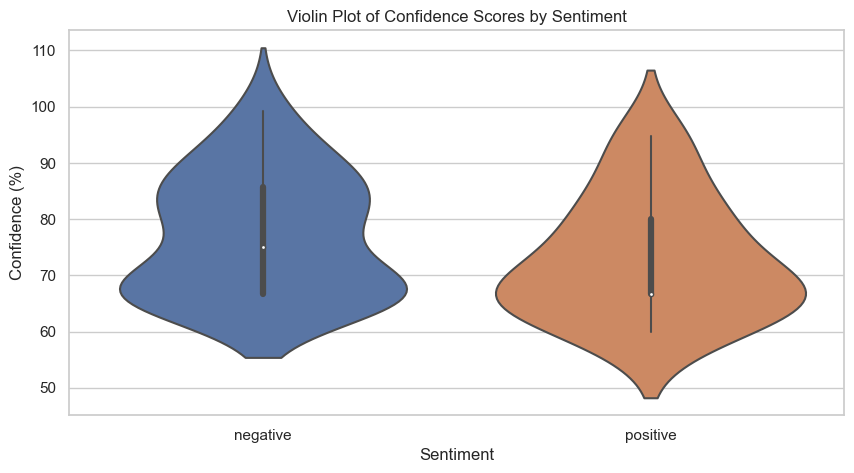

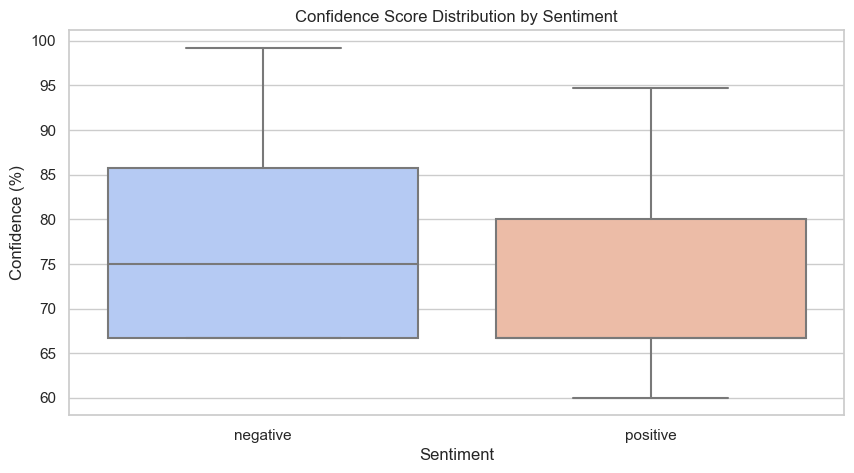

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(sentiment_lst, columns=['Sentiment', 'Confidence'])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.violinplot(x='Sentiment', y='Confidence', data=df)
plt.title("Violin Plot of Confidence Scores by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Confidence (%)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Sentiment', y='Confidence', data=df, palette="coolwarm")
plt.title("Confidence Score Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Confidence (%)")
plt.show()